In [1]:
import pandas as pd
import numpy as np


In [2]:
column_names=['user_id','item_id','rating','timestamp']
data=pd.read_csv('u.data', sep='\t',names=column_names)

In [3]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_title=pd.read_csv('Movie_Id_Titles')

In [5]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df=data.merge(movie_title, on='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

LETS explore the data a bit and get a look at some of the best rated movie

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

lets create a rating dataframe with average rating and number of rating

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings['number of rating']=pd.DataFrame(df.groupby('title')['rating'].count())

In [14]:
ratings.head()

,rating,number of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


create a histograme

<AxesSubplot:>

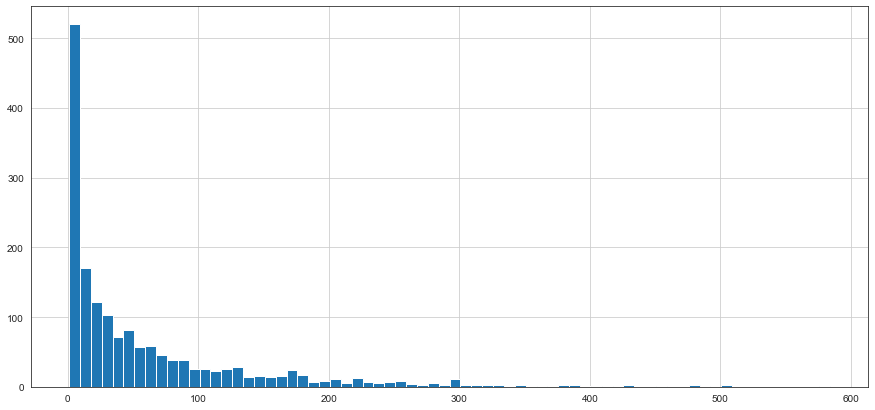

In [15]:
plt.figure(figsize=(15,7))
ratings['number of rating'].hist(bins=70)

<AxesSubplot:>

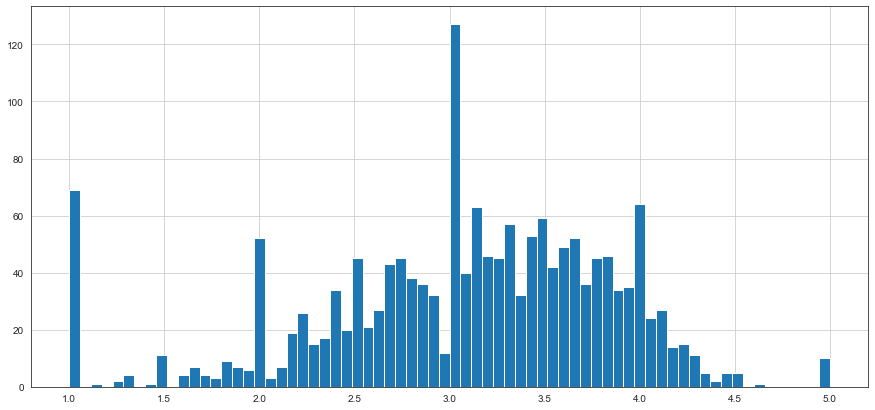

In [16]:
plt.figure(figsize=(15,7))
ratings['rating'].hist(bins=70)

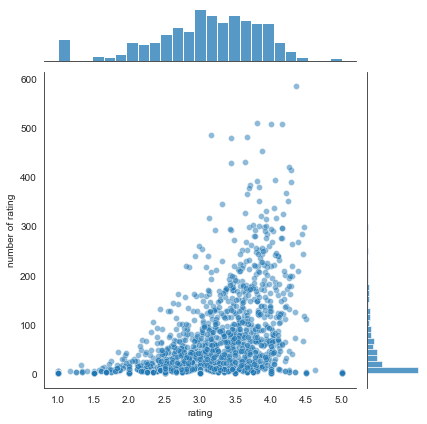

In [17]:
sns.jointplot(x='rating',y='number of rating',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system

# Recommending similar movies

now lets create a matrix that has the user ids on one access and the movie title on another axis.Each cell will than consist of the rating the user gave to that movie.note there will be a lot of nan values.bescaue most people have not seen most of the movies

In [18]:
moviemet=df.pivot_table(index='user_id',columns='title',values='rating')

In [19]:
moviemet.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ratings.sort_values('number of rating',ascending=False).head(10)

,rating,number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [39]:
ratings.sort_values('number of rating',ascending=False).tail(10)

,rating,number of rating
title,,
Girl in the Cadillac (1995),1.0,1
He Walked by Night (1948),4.0,1
Hana-bi (1997),3.0,1
"Object of My Affection, The (1998)",4.0,1
Office Killer (1997),1.0,1
"Great Day in Harlem, A (1994)",5.0,1
"Other Voices, Other Rooms (1997)",3.0,1
Good Morning (1971),1.0,1
Girls Town (1996),3.0,1


Now let's grab the user ratings for those two movies

In [22]:
starwar_user_ratings=moviemet['Star Wars (1977)']
liarliar_user_ratings=moviemet['Liar Liar (1997)']

In [23]:
starwar_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [24]:
similar_to_starwar =moviemet.corrwith(starwar_user_ratings)
similar_to_liarliar =moviemet.corrwith(liarliar_user_ratings)

C:\Users\pooja\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\pooja\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


We can then use corrwith() method to get correlations between two pandas series:

In [41]:
similar_to_starwar.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

lets clean this by removing the nan values and using a dataframe instead of series.

In [25]:
corr_starwars=pd.DataFrame(similar_to_starwar,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head(10)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [26]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [27]:
corr_starwars=corr_starwars.join(ratings['number of rating'])
corr_starwars.head()

,Correlation,number of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [28]:
corr_starwars[corr_starwars['number of rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


After Star Wars (1977) next recommend movie is Empire Strikes Back, The (1980)

Now the same for the comedy Liar Liar:

In [29]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar.head(10)

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
"39 Steps, The (1935)",0.400918
8 1/2 (1963),0.178064


In [35]:
corr_liarliar=corr_liarliar.join(ratings['number of rating'])
corr_liarliar.head()

,Correlation,number of rating
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [36]:
corr_liarliar.sort_values('Correlation',ascending=False).head(10)

,Correlation,number of rating
title,,
"Bonheur, Le (1965)",1.0,4
For Ever Mozart (1996),1.0,3
Crossfire (1947),1.0,4
Johnny 100 Pesos (1993),1.0,2
Moonlight and Valentino (1995),1.0,7
Mina Tannenbaum (1994),1.0,6
"Stranger, The (1994)",1.0,3
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0,3
Legal Deceit (1997),1.0,5


In [38]:
corr_liarliar[corr_liarliar['number of rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


After Liar Liar (1997) movie recommendation system recommed you Batman Forever (1995)	